In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
base = automap_base()

In [20]:
# reflect the tables
base.prepare(engine, reflect=True)

In [21]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table (assigned the measurement and station classes to a variable called by their name)
measurement = base.classes.measurement
measurement

sqlalchemy.ext.automap.measurement

In [29]:
#View columns associated with the table
measurement.__table__.columns.values()
    

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [31]:
# Save references to each table (assigned the measurement and station classes to a variable called by their name)
station = base.classes.station
station

sqlalchemy.ext.automap.station

In [33]:
station.__table__.columns.values()

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [35]:
# Display the first row's column headers and data in measurement and station
for row in session.query(measurement).limit(5).all():
    print(row)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [121]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date>='2016-08-24').all()
precipitation

In [44]:

dates = []
prcps = []
for date, prcp in precipitation:
    if prcp is None: 
        continue
    dates.append(dt.datetime.strptime(date,"%Y-%m-%d"))
    prcps.append(prcp)
type(dates[0])


    


datetime.datetime

Text(0.5, 0, 'Date')

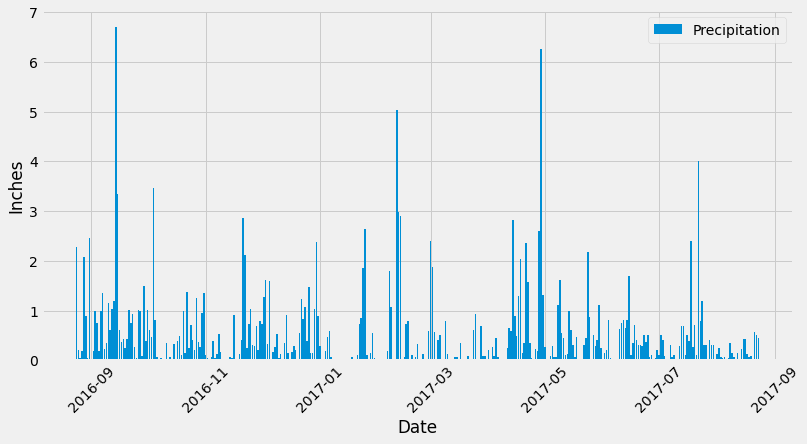

In [50]:
plt.figure(figsize=(12, 6))
plt.bar(dates, prcps, label="Precipitation")
plt.legend()
plt.xticks(rotation=45)
plt.ylabel("Inches")
plt.xlabel("Date")

In [52]:
# Calculate the date 1 year ago from the last data point in the database
date_1_year_ago = "2016-08-24"
date_1_year_ago

'2016-08-24'

In [60]:
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).all()
df = pd.DataFrame(precipitation) 

In [61]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = df.set_index("date")
df.head()

,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN


In [63]:
# Sort the dataframe by date
df = df.sort_index()
df.head()

,prcp
date,
2010-01-01,0.08
2010-01-01,0.21
2010-01-01,0.15
2010-01-01,0.15
2010-01-01,0.05


In [64]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [66]:
# Design a query to show how many stations are available in this dataset?
len(session.query(station).all())

9

In [69]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

df = pd.DataFrame(session.query(measurement.station, measurement.date, measurement.tobs).all())
df.station.value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [70]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station
df[df.station=="USC00519281"].tobs.describe()


count    2772.000000
mean       71.663781
std         4.357642
min        54.000000
25%        69.000000
50%        72.000000
75%        74.000000
max        85.000000
Name: tobs, dtype: float64

Text(0.5, 0, 'Temperature')

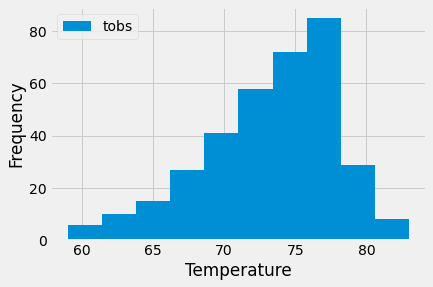

In [77]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = df[(df.station=="USC00519281") & (df.date>="2016-08-24")].tobs
plt.hist(temps, label="tobs")
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Temperature")

## Bonus Challenge Assignment

In [122]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2013-02-02', '2013-02-17'))

[(58.0, 69.44354838709677, 76.0)]


In [131]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


tmin, tavg, tmax = calc_temps('2013-02-02', '2013-02-17')[0]


Text(0.5, 1.0, 'Trip Average Temperature')

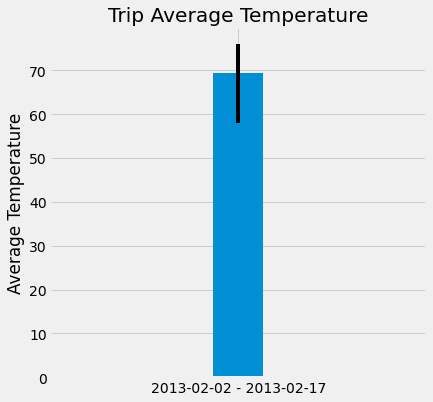

In [133]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(6,6))
plt.bar([0], [tavg])
plt.errorbar([0], [tavg], yerr=([tavg-tmin], [tmax-tavg]), c="k")
plt.gca().set_xlim(-3,3)
plt.xticks([0], ['2013-02-02 - 2013-02-17'])
plt.ylabel("Average Temperature")
plt.title("Trip Average Temperature")


In [102]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation





In [126]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    


In [125]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [127]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

